In [1]:
!pip install pyshark

  Running setup.py bdist_wheel for pyshark: started
  Running setup.py bdist_wheel for pyshark: finished with status 'done'
  Stored in directory: C:\Users\lavin\AppData\Local\pip\Cache\wheels\43\a3\cc\4feefd9396b1389ce8576182cf85fa967ca795b6bddd3c5783
  Running setup.py bdist_wheel for trollius: started
  Running setup.py bdist_wheel for trollius: finished with status 'done'
  Stored in directory: C:\Users\lavin\AppData\Local\pip\Cache\wheels\0f\49\84\11ce8fd28a2d7abd2959fbc6ad29fe61461322914764f3fbb4
Successfully built pyshark trollius


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import pyshark
from IPython.display import Image

OSI Images from https://en.wikipedia.org/wiki/OSI_model

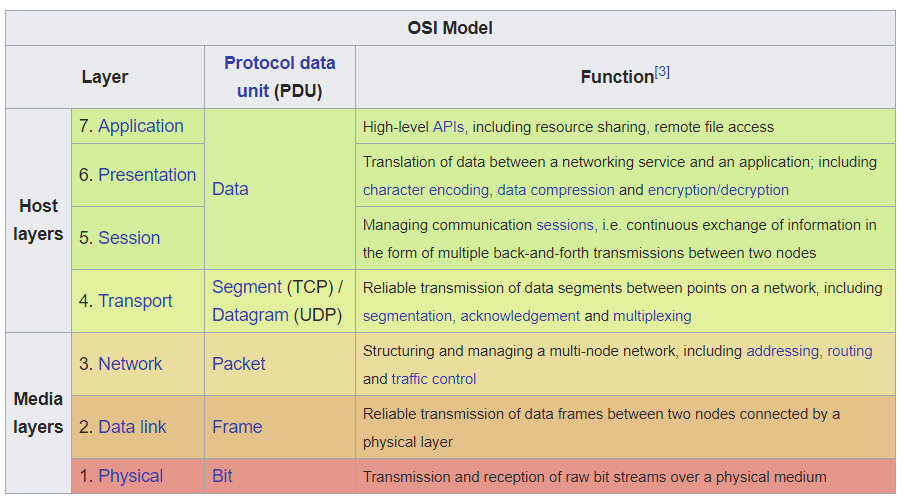

In [3]:
Image('OSIlayers.png')

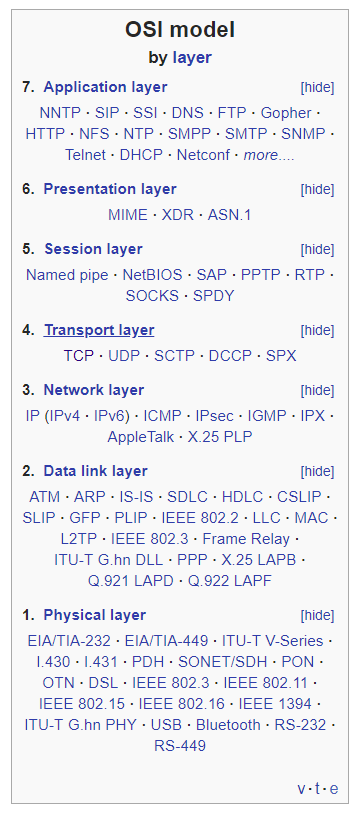

In [7]:
Image('ProtocolExamples.png')

## Task 1
Security analysts and attackers both frequently study network traffic to search for vulnerabilities and to characterize network behavior.  In this section, you will examine network traces from a sample network we set up for this assignment.  

### HTTP Traffic
The attacker starts by probing for a vulnerable Apache Struts web server. 
Using the http packet capture provided, perform the following tasks:

1. The vulnerable server runs an Apache Struts web server. 
   * Identify the IP address of the vulnerable server
   * Identify the port of the vulnerable server

2. In this scenario, while legitimate users browse the Apache Struts web server, an attacker probes for vulnerability in Apache Struts.
   * Plot a timeline of all HTTP requests to the Apache Struts web server with the x axis is the Unix timestamp. Annotate each HTTP request with its path. 
   * Plot a histogram of the path of all HTTP requests to the Apache Struts web server. The x axis is the path of an HTTP request, and the y axis is its count.
   * Compute the time between HTTP requests (in second). Plot a boxplot of time between HTTP requests. 
3. The attacker crafts malicious HTTP requests to exploit the Apache Struts web server. Such requests have an abnormally long values in their Content-Type header.
   * Collect a list that contains the value of the Content-Type headers
   * Plot a CDF of the length of Content-Type header
   * Provide a list of UNIX commands are present in the Content-Type header. Interpret the utility of such commands, i.e., how such commands help an attacker to achieve the objective.
4. Based on your analysis
   * Identify the IP address of the attacker
   * Identify the ports that the attacker use to send malicious HTTP requests


#### Let's take a look at the http pcap file

In [2]:
http = pyshark.FileCapture('data/http.pcap', keep_packets=True)

#### How many packets do we have?

In [3]:
len(http)

0

#### Weird...let's try indexing into the capture object

In [5]:
http[5].show()

Layer ETH:
	Destination: 02:42:63:79:49:dd
	Address: 02:42:63:79:49:dd
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Source: 02:42:ac:11:00:02
	Type: IPv4 (0x0800)
	Address: 02:42:ac:11:00:02
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
Layer IP:
	0100 .... = Version: 4
	.... 0101 = Header Length: 20 bytes (5)
	Differentiated Services Field: 0x00 (DSCP: CS0, ECN: Not-ECT)
	0000 00.. = Differentiated Services Codepoint: Default (0)
	.... ..00 = Explicit Congestion Notification: Not ECN-Capable Transport (0)
	Total Length: 7340
	Identification: 0x396b (14699)
	Flags: 0x02 (Don't Fragment)
	0... .... = Reserved bit: Not set
	.1.. .... = Don't fragment: Set
	..0. .... = More fragments: Not set
	Fragment offset: 0
	Time to live: 64
	Prot

In [36]:
len(http)

6

#### Hmm...looks like pyshark reads packets on demand
#### Lets go through the pcap file till the very end

In [6]:
try:
    i = 0
    while True:
        http[i]
        i += 1
except KeyError:
    pass


In [7]:
len(http)

604

#### Looks like we have all packets

#### Next, we'll inspect the contents of a packet

In [8]:
http[2]

<TCP Packet>

#### That doesn't tell us much, what functions can we call on http[2]?

In [9]:
dir(http[2])

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_packet_string',
 'captured_length',
 'eth',
 'frame_info',
 'get_multiple_layers',
 'highest_layer',
 'interface_captured',
 'ip',
 'layers',
 'length',
 'number',
 'pretty_print',
 'show',
 'sniff_time',
 'sniff_timestamp',
 'tcp',
 'transport_layer']

#### Let's see what 'layers' tells us

In [10]:
http[2].layers

[<ETH Layer>, <IP Layer>, <TCP Layer>]

#### Three layers, ETH, IP and TCP

In [12]:
ETH = 0
IP = 1
TCP = 2
http[2][ETH].pretty_print()

Layer ETH:
	Destination: 02:42:ac:11:00:02
	Address: 02:42:ac:11:00:02
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Source: 02:42:63:79:49:dd
	Type: IPv4 (0x0800)
	Address: 02:42:63:79:49:dd
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)


In [13]:
http[2][IP]

<IP Layer>

In [14]:
http[2][TCP]

<TCP Layer>

#### Okay, what about inspecting individual layers?

In [90]:
dir(http[2][IP])

['',
 'DATA_LAYER',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_fields',
 '_field_prefix',
 '_get_all_field_lines',
 '_get_all_fields_with_alternates',
 '_get_field_or_layer_repr',
 '_get_field_repr',
 '_layer_name',
 '_sanitize_field_name',
 'addr',
 'checksum',
 'checksum_status',
 'dsfield',
 'dsfield_dscp',
 'dsfield_ecn',
 'dst',
 'dst_host',
 'field_names',
 'flags',
 'flags_df',
 'flags_mf',
 'flags_rb',
 'frag_offset',
 'get',
 'get_field',
 'get_field_by_showname',
 'get_field_value',
 'hdr_len',
 'host',
 'id',
 'layer_name',
 'len',
 'pretty_print',
 'proto',
 'raw_mode',
 'src',
 'src_host',
 'ttl'

In [91]:
dir(http[2][TCP])

['DATA_LAYER',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_fields',
 '_field_prefix',
 '_get_all_field_lines',
 '_get_all_fields_with_alternates',
 '_get_field_or_layer_repr',
 '_get_field_repr',
 '_layer_name',
 '_sanitize_field_name',
 'ack',
 'analysis',
 'analysis_ack_rtt',
 'analysis_acks_frame',
 'analysis_initial_rtt',
 'checksum',
 'checksum_status',
 'dstport',
 'field_names',
 'flags',
 'flags_ack',
 'flags_cwr',
 'flags_ecn',
 'flags_fin',
 'flags_ns',
 'flags_push',
 'flags_res',
 'flags_reset',
 'flags_str',
 'flags_syn',
 'flags_urg',
 'get',
 'get_field',
 'get_field_by_showname',
 'get_field_va

#### Lets extract the destination IP address and port

In [15]:
dest_ip = http[2][IP].dst
dest_port = http[2][TCP].dstport
print(dest_ip, ':',dest_port)

172.17.0.2 : 8080


#### Extract all IP, PORT pairs to a dataframe

In [17]:
df_data = []
for pkt in http:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'dest_ip': pkt[IP].dst,
        'dest_port': pkt[TCP].dstport
    }
    df_data.append(d)

In [18]:
df = pd.DataFrame(df_data)
df.to_csv("http_df.csv", sep='\t')

In [20]:
print(df.head())
print(len(df))

      dest_ip dest_port     timestamp
0  172.17.0.2      8080  1.521395e+09
1    10.0.2.2     55952  1.521395e+09
2  172.17.0.2      8080  1.521395e+09
3  172.17.0.2      8080  1.521395e+09
4    10.0.2.2     55952  1.521395e+09
600


In [21]:
df.groupby(['dest_ip', 'dest_port']).count()

timestamp
dest_ip         dest_port           
10.0.2.2        55952             45
                55959             21
                55966             39
                55968             10
                55970             10
                55972             14
162.212.156.148 80                 9
172.17.0.1      34322              5
                36782              7
                39926              8
                44126              7
                48404              7
                53886              5
                54084              5
                55058              5
                55308              7
                55788              5
                56412              7
                59796              5
                60130              5
                60510              7
172.17.0.2      34370              8
                39066              1
                8080             358

In [22]:
df['dest_ip'].unique()

array(['172.17.0.2', '10.0.2.2', '172.17.0.1', '162.212.156.148'], dtype=object)